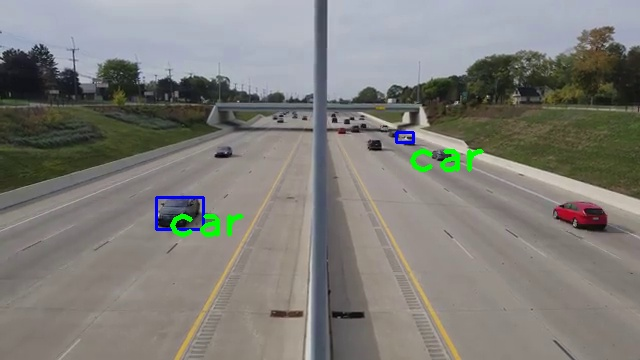

In [1]:
import cv2
from IPython.display import display, Image, clear_output
import time

# Model loading and initialization
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "frozen_inference_graph.pb"
model = cv2.dnn_DetectionModel(frozen_model, config_file)

# Class labels
ClassLabels = []
file_name = "labels.txt"
with open(file_name, 'rt') as fpt:
    ClassLabels = fpt.read().rstrip('\n').split('\n')

# Model configuration
model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

# Video capture
cap = cv2.VideoCapture("highway.mp4")# Or 0 for webcam
#cap = cv2.VideoCapture(0)

try:
    while True:
        ret, frame = cap.read()

        if not ret:
            break

        # Object detection
        ClassIndex, Confidence, bbox = model.detect(frame, confThreshold=0.55)

        # Draw bounding boxes and labels
        font_scale = 3
        font = cv2.FONT_HERSHEY_PLAIN
        for ClassInd, conf, boxes in zip(ClassIndex, Confidence, bbox):  # Removed flatten() calls
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, ClassLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

        # Convert frame to JPEG for display
        _, jpeg_frame = cv2.imencode('.jpg', frame)
        display(Image(data=jpeg_frame.tobytes()))

        clear_output(wait=True)
        time.sleep(0.05)

except KeyboardInterrupt:
    pass

finally:
    cap.release()